In [28]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cmocean.cm as cm


In [13]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Squamish_Brackendale_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
river = riv_df.rename(columns=mapping)
river

,YYYY,MM,DD,DISCHARGE,4
0,1922,11,24,51.30000,NaN
1,1922,11,25,115.00000,NaN
2,1922,11,26,279.00000,NaN
3,1922,11,27,331.00000,NaN
4,1922,11,28,360.00000,NaN
...,...,...,...,...,...
25367,2023,4,19,66.94132,NaN
25368,2023,4,20,59.95625,NaN
25369,2023,4,21,57.38947,NaN
25370,2023,4,22,54.81875,NaN


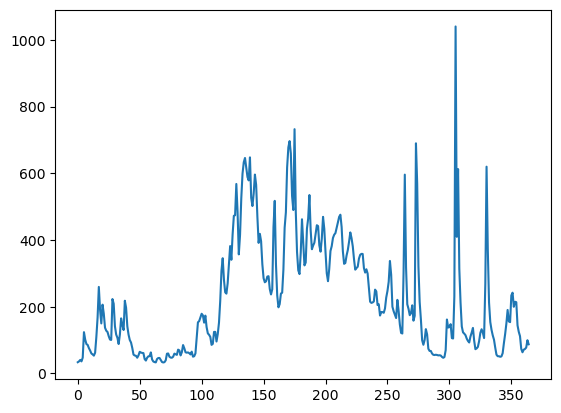

In [16]:
river_2018 = river[river['YYYY'] == 2018]
plt.plot(np.arange(len(river_2018)), river_2018['DISCHARGE'])

In [32]:
physics = xr.open_dataset('../../../../civil541/HoweSound_dayavg_phys_20180101_20181231.nc')
physics

<xarray.Dataset>
Dimensions:   (time: 365, depth: 40, gridY: 40, gridX: 40)
Coordinates:
  * time      (time) datetime64[ns] 2018-01-01T12:00:00 ... 2018-12-31T12:00:00
  * depth     (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY     (gridY) int64 500 501 502 503 504 505 ... 534 535 536 537 538 539
  * gridX     (gridX) int64 355 356 357 358 359 360 ... 389 390 391 392 393 394
Data variables:
    votemper  (time, depth, gridY, gridX) float32 ...
    vosaline  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         HoweSound_dayavg_phys_2018_20180101_20181231
    description:  Day-averaged temperature and salinity extracted from Salish...
    history:      2023-04-24 17:41 -07:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [36]:
sal_arr = physics.vosaline.to_numpy()
temp_arr = physics.votemper.to_numpy()

In [24]:
# make a mask of land where land is true and water in NaN
bathymetry = xr.open_dataset('../../../../MEOPAR/grid/bathymetry_201702.nc')
land = np.array(np.isnan(bathymetry.Bathymetry).to_numpy(), dtype='float')
land[land == 0] = np.nan

# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('../../../../MEOPAR/grid/mesh_mask201702.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [30]:
# make the indicies for plotting six sample salinity fields
plot_ind = np.array([[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]])
plot_day = np.array([0, 50, 100, 150, 200, 250])  # this selects what days of each year to plot, change for > 1 year

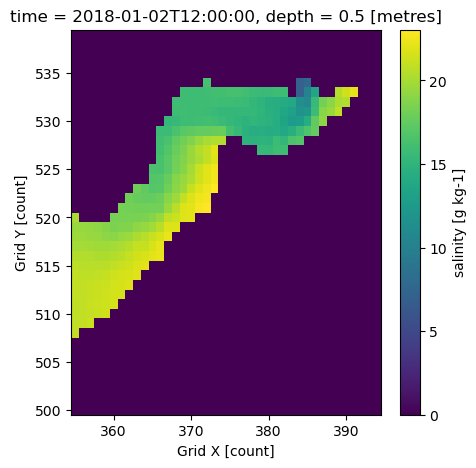

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
physics.vosaline[1, 0].plot(ax=ax);

MaskError: Mask and data not compatible: data size is 0, mask size is 357404.

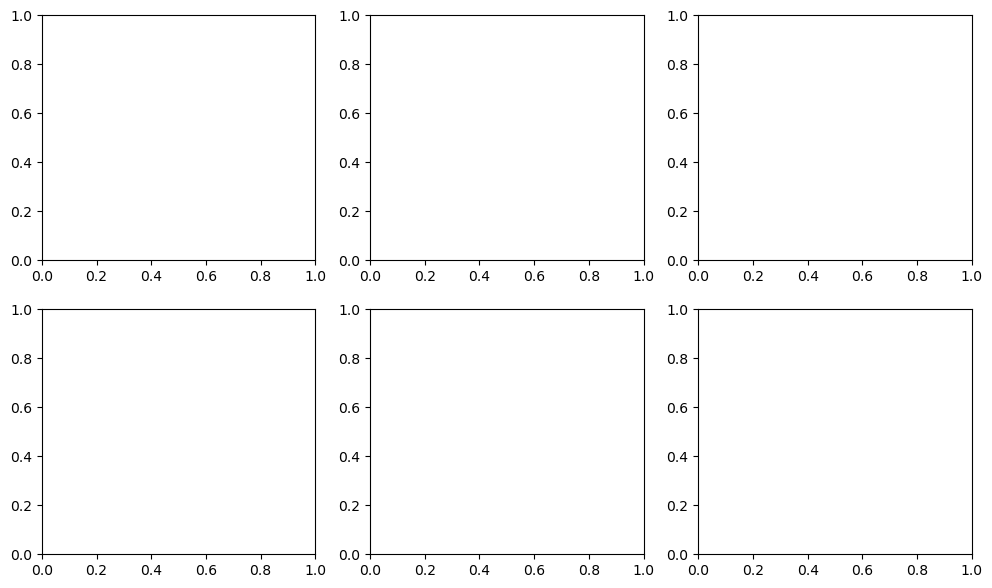

In [31]:
kd = 0 ## this will stay for surface
imin = 500
imax = 540
jmin = 355
jmax = 395
dm = physics

fig1, ax1 = plt.subplots(2, 3, figsize=(12, 7))

for i in np.arange(0,6):
    
    cmap = cm.haline
    cmap.set_bad('gray')

    
    day = plot_day[i]
    day_str = np.datetime_as_string(physics.time[day].values, unit='D')
    # salinity plot
    myarray = np.ma.array(dm.vosaline[day, kd, imin:imax, jmin:jmax])
    salinity = np.ma.masked_array(myarray, mask=tmask[0])
    colours = ax1[plot_ind[i][0], plot_ind[i][1]].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), salinity, cmap=cm.haline, shading='auto')
    ax1[plot_ind[i][0], plot_ind[i][1]].set_title(day_str)
    cb = fig1.colorbar(colours, ax=ax1[plot_ind[i][0], plot_ind[i][1]])
    cb.set_label('Salinity (g/kg)')
    viz_tools.set_aspect(ax1[plot_ind[i][0], plot_ind[i][1]]);
    
    
fig1.suptitle(f'Salinity at {kd+0.5} m (g/kg)')